Copyright 2020 Dale Bowman, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Regression trees

In a previous notebook, you learned about decision trees which are used to predict a class label.
In this notebook, we will see how the decision trees can be used to make numeric predictions.
This method is known as *regression trees*.

Both methods partition a data set based on criteria of different variables (features) which can be categorical and/or numeric, and both methods have a tree structure.
We'll first begin with a a complete example of regression trees without code and then break the example down with code.

## What you will learn

In this notebook you will learn how to use decision trees with numerical and categorical variables to make predictions.  We will study the following:

- Basics of regression trees
- How to construct regression trees
- Pruning

## When to use regression trees

Regression trees are useful when you want to make a fast prediction using a decision tree.  They are used when the relationship between variables and the response might not be linear and when you want to know which variables have the largest impact on the response.

## Basics of Regression Trees

Unlike multiple regression, which assumes the relationship between response and features is linear, regression trees make no assumptions about the relationship between response and features.
In other words, regression trees are non-parametric models. 
This makes regression trees particularly useful when the relationship between response and features is non-linear and difficult to specify.

The figure below is an example of a regression tree.
In this model, baseball players salaries are predicted based on how long they have been playing and the number of hits the player had in the previous season.
Because the salaries of some baseball players can be much larger than the majority of the players (i.e.
the salaries have outliers), we use a transformation and look at the log of the salaries.

<!--  ![](HittersPrune){width="12cm"} -->
<!-- 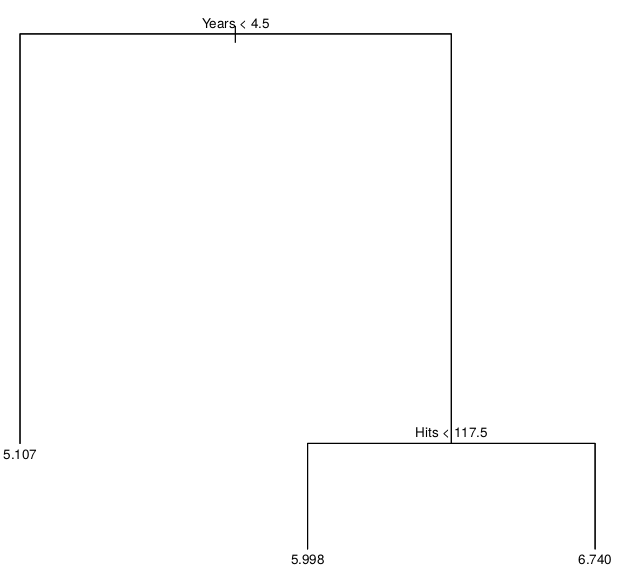 -->
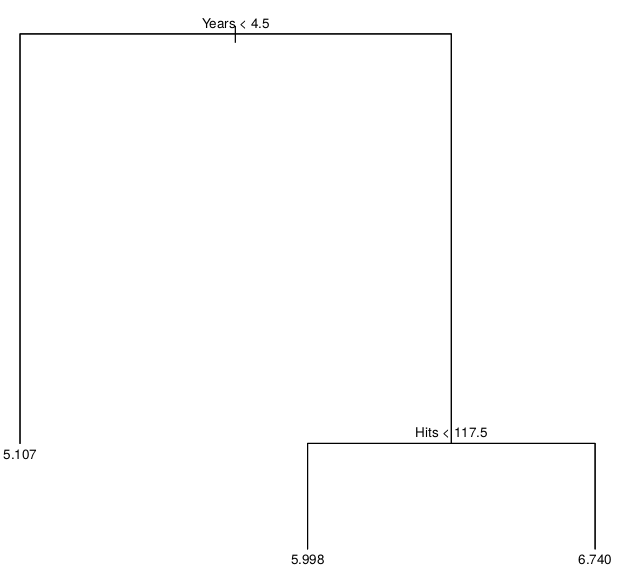
<center><b>Figure 1</b></center>

In this tree, the first partition is based on whether the player has been playing less than 4.5 years (left branch) or greater than or equal to 4.5 years (right branch).
For players who have been playing less than 4.5 years, the number of hits is not useful in predicting their salary. Their salary is predicted by averaging all the salaries of players with years &lt; 4.5.
This number is shown at the leaf of this branch and is 5.107.
Remember this is the log of the salary (in thousands of dollars) and so the predicted salary is $1000*e^{5.107} = \$ 165,174$.

 For the players that have been playing for longer than 4.5 years, the variable *Hits* further distinguishes the predicted salary.
For those with hits below 117.5, the predicted log salary, 5.998, is found as the average log salary of all players who have both $ Years \ge 4.5$ and $Hits < 117.5$.

<!--  ![](regPlot){width="12cm"} -->
<!-- 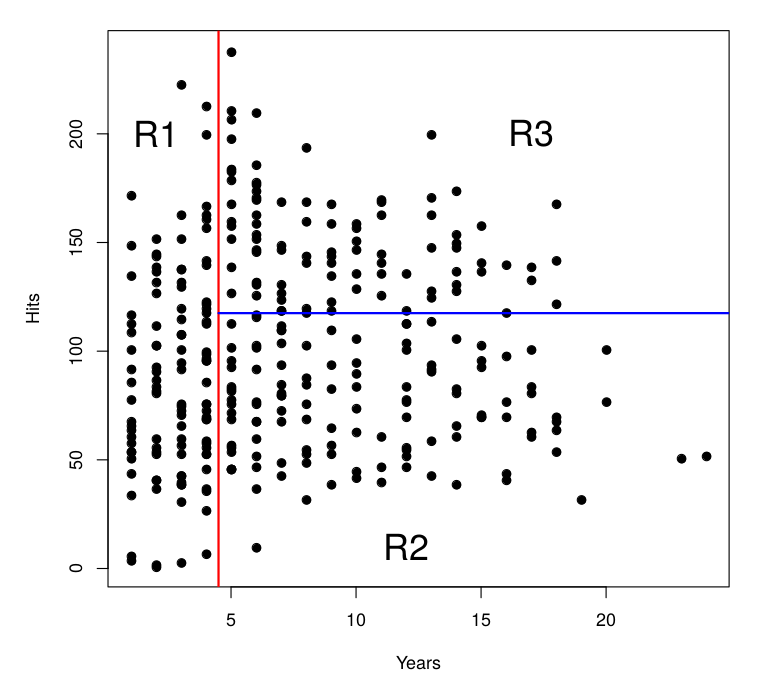 -->
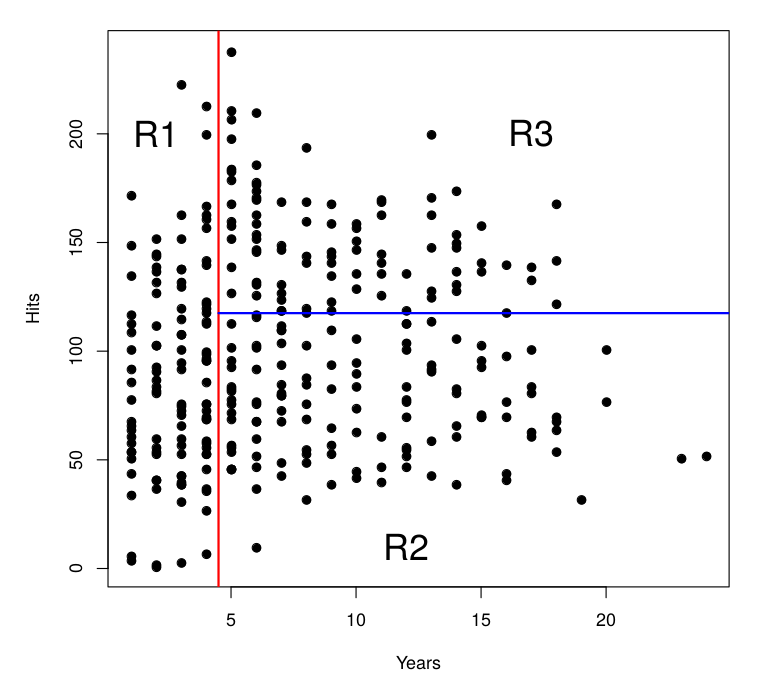
<center><b>Figure 2</b></center>

The regression tree can be visualized as in the plot in Figure 2.
This kind of plot is sometimes called a *decision surface* and is way of visualizing a tree on top of a scatterplot of the data.
The region *R1* corresponds to all players who have been playing less than 4.5 years.
The average of the log salaries in region R1 is the predicted value shown in the leftmost leaf of the tree in Figure 1, 5.107.
The three regions can be summarized as:

 -   R1: X | Years &lt;4.5

 -   R2: X | Years $\ge$ 4.5, Hits &lt; 117.5

 -   R3: X | Years $\ge$ 4.5, Hits $\ge$ 117.5
 
Thus each region corresponds to a leaf in Figure 1.

## How are regression trees made?

 The algorithm that creates the tree partitions the set of features into $J$ distinct and non-overlapping regions, $R_1, R_2, \ldots, R_J$.
The predicted response in region $R_i$ is then the **mean** (arithmetic average) of the responses in that region.
The regions are defined to be rectangles (or higher-dimension boxes) for simplicity.
The regions are chosen to minimize the **sum of the squared differences** between each observed response and the predicted response (like linear regression).
It is not computationally possible to look at all possible partitions, so the regression tree is constructed using *recursive binary splitting*, which means that at each split, the tree branches into two parts choosing the best split (in terms of the sum of squared differences).

## Pruning

 The tree shown in Figure 1 is actually derived from another tree by *pruning*.
It is a tree that has been pruned to have only three nodes.
A bigger tree is shown in the figure below.
This tree has eight nodes rather than three and the prediction of salary is seen to be a bit more complex than the previous tree.

<!--  ![](treefit){width="12cm"} -->
<!-- 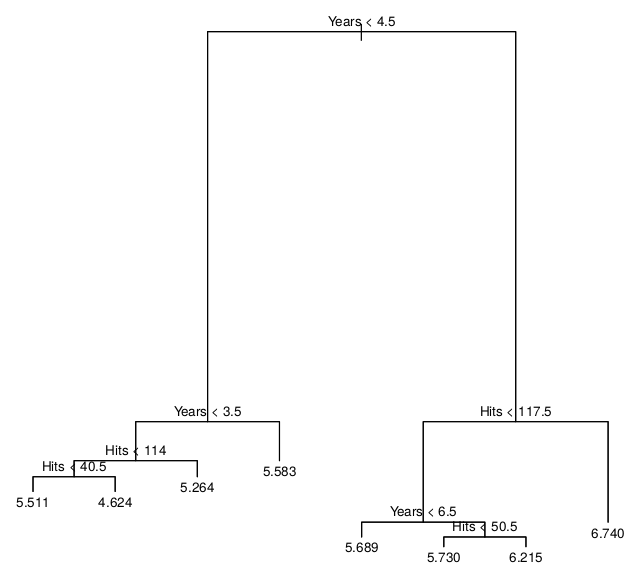 -->
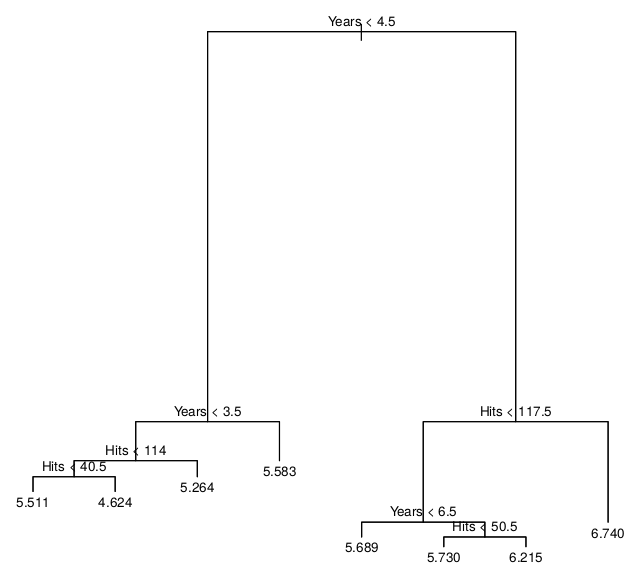
<center><b>Figure 3</b></center>

It is often a good idea to start with a big tree and use some systematic methods to prune the tree to an acceptable or optimal level.
Pruning is the same idea as regularization, which we talked about with lasso and ridge regression.
There are algorithms similar to the Lasso that can be used to find a good pruning (called a *subtree*) for our regression tree that *penalizes* the sum of squared errors for having more nodes.
For example, if you have the number of nodes equal to the number of data points with one point per node, your sum of squared errors would be zero since the predicted value would equal the observed value for all nodes.
But this would not be very good for prediction of a new data point.
Ideally we would like to have enough nodes (leaves) so that the responses within each leaf are closely spaced and the regression surface is nearly constant.

## Summary

 Some of the advantages of regression trees are summarized here.

 -   Making predictions is fast - you just look up the constants in the tree.

 -   It is easy to see what variables are most important in making the predictions.

 -   If some data is missing and we can't get all the way to a leaf, we can still make a prediction by averaging all the leaves in the subtree we can reach.

 -   The model works well for non-linear relationships and for linear relationships.

 -   The trees can be built quickly using computer algorithms. 

## Example: Baseball

The theory section above uses the following Major League Baseball data from 1986 and 1987.

We would like to predict `Salary` as described above, using just `Hits` and `Years`.

| Variable  | Type    | Description                                                                      |
|:-----------|:---------|:----------------------------------------------------------------------------------|
| AtBat     | Ratio   | Number of times at bat in 1986                                                   |
| Hits      | Ratio   | Number of hits in 1986                                                           |
| HmRun     | Ratio   | Number of home runs in 1986                                                      |
| Runs      | Ratio   | Number of runs in 1986                                                           |
| RBI       | Ratio   | Number of runs batted in in 1986                                                 |
| Walks     | Ratio   | Number of walks in 1986                                                          |
| Years     | Ratio   | Number of years in the major leagues                                             |
| CAtBat    | Ratio   | Number of times at bat during his career                                         |
| CHits     | Ratio   | Number of hits during his career                                                 |
| CHmRun    | Ratio   | Number of home runs during his career                                            |
| CRuns     | Ratio   | Number of runs during his career                                                 |
| CRBI      | Ratio   | Number of runs batted in during his career                                       |
| CWalks    | Ratio   | Number of walks during his career                                                |
| League    | Nominal | A factor with levels A and N indicating player's league at the end of 1986       |
| Division  | Nominal | A factor with levels E and W indicating player's division at the end of 1986     |
| PutOuts   | Ratio   | Number of put outs in 1986                                                       |
| Assists   | Ratio   | Number of assists in 1986                                                        |
| Errors    | Ratio   | Number of errors in 1986                                                         |
| Salary    | Ratio   | 1987 annual salary on opening day in thousands of dollars                        |
| NewLeague | Nominal | A factor with levels A and N indicating player's league at the beginning of 1987 |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

### Load data

Import the library for dataframes:

- `import pandas as pd`

In [20]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="importAs" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field></block></xml>

Load the data into a dataframe:

- Set `dataframe` to with `pd` do `read_csv` using
    - `"datasets/baseball.csv"`
- `dataframe` (to display)

In [21]:
dataframe = pd.read_csv('datasets/baseball.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="52" y="137"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><value name="VALUE"><block type="varDoMethod" id="ny0sjvqTnn2B]K2za7Li"><mutation items="1"></mutation><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/baseball.csv</field></block></value></block></value></block><block type="variables_get" id="OEsj(vQN@22M1c2l%X+m" x="8" y="296"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


Take a look at the first row, all the way across.
See the problem?

There are `NaN`s in this data. 
`NaN` stands for "not a number" and is one of the common codes for missing data (the other is "NA" or "na").
The problem for us is that we can't fit a model to missing data.
We previously solved this problem with the diabetes data my replacing 0 with the median, but this time we are simply going to drop all rows/datapoints that have NaN in them:

- Set`dataframe` to with `dataframe` do `dropna`
- `dataframe`

In [22]:
dataframe = dataframe.dropna()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="variables_set" id="9fdSqn(p63;|xF2dsBzV" x="-58" y="248"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><value name="VALUE"><block type="varDoMethod" id="k414[4+X9^ReM#GZsDps"><mutation items="1"></mutation><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></value></block><block type="variables_get" id="W=AALkkNnq64,NQ~6w6." x="-60" y="304"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


Scroll across to the right, the `NaN` should be gone, and the first row is now what was previously the second row.

Let's take a closer look with descriptive statistics:

- with `dataframe` do `describe`

In [23]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="!Zc!z*.{~{;mL/TXW,^H" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


Looks good.
Remember the salary is in thousands of dollars.

Since we are interested in building a model with only `Salary`, `Hits`, and `Years`, let's do histograms of those and then scatterplots of `Hits` and `Years` against `Salary`.

Import the plotting library `plotly`:

- `import plotly.express as px`

In [24]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable></variables><block type="importAs" id="UYYr+A=32@kfH{hOCF1j" x="-50" y="10"><field name="libraryName">plotly.express</field><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field></block></xml>

Make a histogram of salary:

- with `px` do `histogram` using
    - `dataframe`
    - freestyle `x="Salary"`

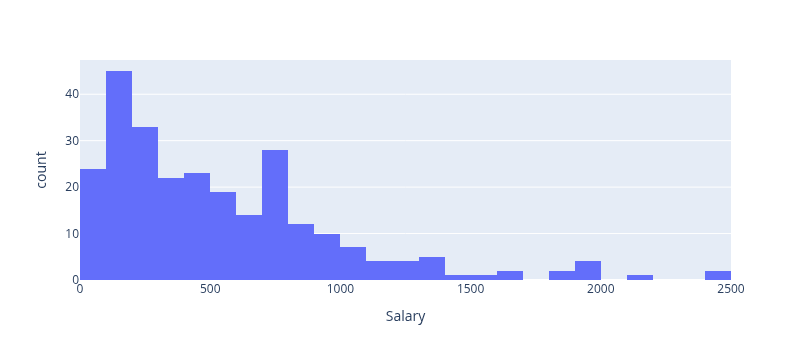

In [25]:
px.histogram(dataframe,x="Salary")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="BA;^5Vw*oM|6hd_74/:@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="xcKQ|UB~$Lic5K+++,]}"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Z6+99ubtI^8E_8qB=7Vu"><field name="CODE">x="Salary"</field></block></value></block></xml>

Notice that salary is not normally distributed (bell shaped).
This is a problem for regression methods that use sum squared error, because it probably means that the small number of high salaries will unduly influence the model (i.e. be **outliers**).

Similarly, make a histogram for `Hits`

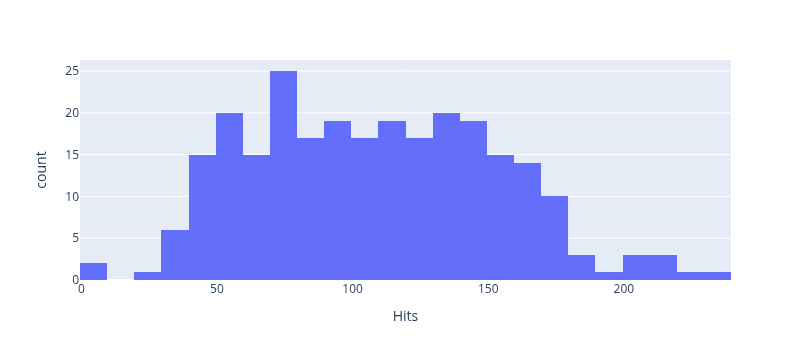

In [26]:
px.histogram(dataframe,x="Hits")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="BA;^5Vw*oM|6hd_74/:@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="xcKQ|UB~$Lic5K+++,]}"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Z6+99ubtI^8E_8qB=7Vu"><field name="CODE">x="Hits"</field></block></value></block></xml>

Looks reasonable. Make a histogram for `Years`.

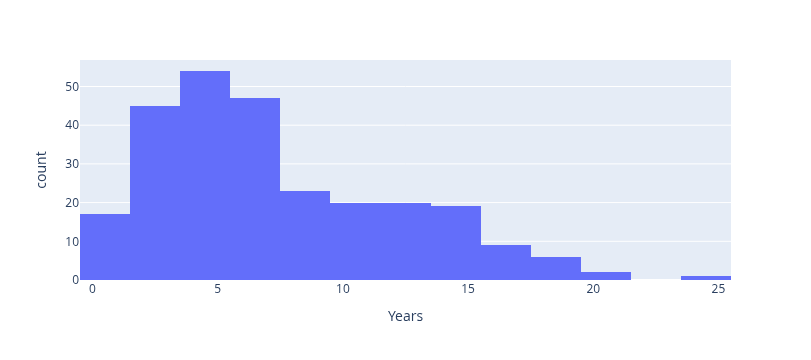

In [27]:
px.histogram(dataframe,x="Years")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="BA;^5Vw*oM|6hd_74/:@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="xcKQ|UB~$Lic5K+++,]}"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Z6+99ubtI^8E_8qB=7Vu"><field name="CODE">x="Years"</field></block></value></block></xml>

Also reasonable. 
Although `Years` is pretty close to bell-shaped (normal), if it were worse AND we were doing linear regression, we might consider transforming it to make it more normal.
However, we don't need to do that with a regression tree - our predictors can be as wacky as we want.
We *do* need to transform `Salary` though, for the reason given above.
There's a cool trick we can use for that after we prepare the data.

Before we get to that though, let's take a look at what transforming does in the first place.
We need to get `numpy` first so we can do some transformations:

- `import numpy as np`

In [28]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="]r.MVxn$.B;84`lPo@#0">np</variable></variables><block type="importAs" id="405[o%Y^^u?jrH7uGE3H" x="50" y="96"><field name="libraryName">numpy</field><field name="VAR" id="]r.MVxn$.B;84`lPo@#0">np</field></block></xml>

Log transform `Salary` using `np.log1p`:

- with `px` do `histogram` using
    - freestyle `np.log1p(dataframe["Salary"])`

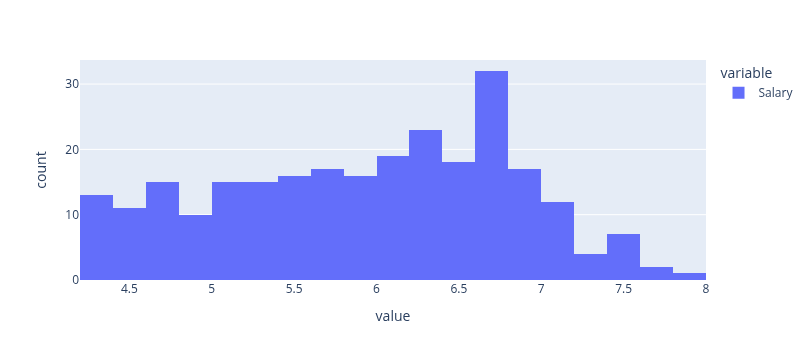

In [29]:
px.histogram(np.log1p(dataframe["Salary"]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable></variables><block type="varDoMethod" id="BA;^5Vw*oM|6hd_74/:@" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Un@8S)9xA*2a+h$`-/a*"><field name="CODE">np.log1p(dataframe["Salary"])</field></block></value></block></xml>

Notice that the distribution went from being tallest on the left to being tallest in the middle, albeit with some mass still on the left.
Also notice that the x-axis is no longer salary in dollars, but log dollars, as in the theory description above.

### Prepare train/test sets

We need to split the dataframe into training data and testing data, and also separate the predictors from the class labels.

Often we'd drop the label/response and use all the predictors, but in this case, we only want to use two of the predictors.
So let's make `X` and `Y` but specify what we want in them, instead of what we don't want (which is what `drop` does):

- Set `X` to `dataframe[ ]` with a list inside containing
    - `"Hits"`
    - `"Years"`
- Set `Y` to freestyle `np.log1p(dataframe[['Salary']])`

In [30]:
X = dataframe[['Hits', 'Years']]
Y = np.log1p(dataframe[['Salary']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="14" y="218"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="indexer" id="j=Z_K.WWn/9N*(a@bA3K"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><value name="INDEX"><block type="lists_create_with" id="ksS~@;rQlcBm^$UpDnN["><mutation items="2"></mutation><value name="ADD0"><block type="text" id="1gDaV2Up^Qc2nvQLQ?!]"><field name="TEXT">Hits</field></block></value><value name="ADD1"><block type="text" id="=z+WAl0YMW!q.Q?c(,lr"><field name="TEXT">Years</field></block></value></block></value></block></value><next><block type="variables_set" id=":eCC|=CT/c:_fzcI.h5%"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="dummyOutputCodeBlock" id="|Yv3DRI3rsWbW.F--i)z"><field name="CODE">np.log1p(dataframe[['Salary']])</field></block></value></block></next></block></xml>

Import `sklearn.model_selection` so we can split the data into train/test sets:

- `import sklearn.model_selection as model_selection`

In [31]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual split:

- Set `splits` to with `model_selection` do `train_test_split` using
    - `X` 
    - `Y`
    - freestyle `random_state=1` (this will make your random split the same as mine)

In [32]:
splits = model_selection.train_test_split(X,Y,random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-23" y="72"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><mutation items="3"></mutation><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

### Fit model

Import the `sklearn.tree` library so we can fit a regression tree model:

- `import sklearn.tree as tree`

<!-- Import the `sklearn.tree` library and a new library that will help us transform `Salary`, `sklearn.compose`:

- `import sklearn.tree as tree`
- `import sklearn.compose as compose` -->

In [33]:
import sklearn.tree as tree
import sklearn.compose as compose

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="M|:g+;ctW@tTiAEo!~1V">compose</variable></variables><block type="importAs" id="goc_V=/,8MnTaM{TCljC" x="50" y="70"><field name="libraryName">sklearn.tree</field><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><next><block type="importAs" id="CT*D}9wzDx%yzj]yd^C#"><field name="libraryName">sklearn.compose</field><field name="VAR" id="M|:g+;ctW@tTiAEo!~1V">compose</field></block></next></block></xml>

Create the regression tree model:

- Set `model` to with `tree` create `DecisionTreeRegressor`

In [34]:
model = tree.DecisionTreeRegressor(ccp_alpha=0.02)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="y)}CJbWuNk[5e38?/#{t">model</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="variables_set" id="zW~dc)uX.9yIdvHf.vvz" x="74" y="231"><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><value name="VALUE"><block type="varCreateObject" id="0I6gCe=.wV.oI1[UHnIf"><mutation items="1"></mutation><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">DecisionTreeRegressor</field><data>tree:DecisionTreeRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="hB)+jESMQM{e2WM[;CMJ"><field name="CODE">ccp_alpha=0.02</field></block></value></block></value></block></xml>

Fit the model, and get predictions:

- with `model` do `fit` using:
    - `in list splits get # 1` (this is Xtrain)
    - `in list splits get # 3` (this is Ytrain)
- Set `predictions` to with `model` do `predict` using
    - `in list splits get # 2` (this is Xtest)

In [35]:
model.fit(splits[0],splits[2])

predictions = model.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="y)}CJbWuNk[5e38?/#{t">model</variable><variable id=".hU+?FvKPIm~!dS$d-nj">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">fit</field><data>model:fit</data><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block><block type="variables_set" id="8GF@]VO%5B2QY(9W8S42" x="1" y="195"><field name="VAR" id=".hU+?FvKPIm~!dS$d-nj">predictions</field><value name="VALUE"><block type="varDoMethod" id="_[M^?b_]5WAk~%i)W7vs"><mutation items="1"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">predict</field><data>model:predict</data><value name="ADD0"><block type="lists_getIndex" id="uk!H]Ac4Jb-{:Gm,nnj["><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="7cK(q-9*S_,V0/|Yvf=g"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="+{r,qcOEw@AR=6_4oMG8"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

# Evaluate the model

Get the $r^2$ on the *training* set:

- `print` `create text with`
    - `"Training r2"`
    - with `model` do `score` using
        - `in list splits get # 1` (this is Xtrain)
        - `in list splits get # 3` (this is Ytrain)
        
Copy and modify the blocks to get the $r^2$ on the *testing* set:

- `print` `create text with`
    - `"Testing r2"`
    - with `model` do `score` using
        - `in list splits get # 2` (this is Xtest)
        - `in list splits get # 4` (this is Ytest)

In [36]:
print('Training r2:' + str(model.score(splits[0],splits[2])))
print('Testing r2:' + str(model.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="y)}CJbWuNk[5e38?/#{t">model</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="-47" y="306"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">score</field><data>model:score</data><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="|-ERRuo3*XHY80H}YhXF"><value name="TEXT"><block type="text_join" id=";Te5E~GtH9dv8{qp[U:@"><mutation items="2"></mutation><value name="ADD0"><block type="text" id=":-11rvnXpgdoNr[C_:^a"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="R==U1*znQ/jMAW#;s]29"><mutation items="2"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">score</field><data>model:score</data><value name="ADD0"><block type="lists_getIndex" id="i084N_e9(a%L7p.SDi.s"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="S%I(G6amV-zzpHsiM#;Y"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="F.D=M4Lo7*q?IwMyCy;["><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id=".JqtS=TqJGtibpup#b%@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="wh]FU*Pa{:_=vg)k_4iA"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="/SbPu0b2ew/^kOIk%h^G"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.6787409741390624
Testing r2:0.47301371565421824


What happened?
Our training accuracy is almost perfect, but our test set accuracy is much worse.
This is a classic example of **overfitting** which means that we have overfit the training data and can no longer generalize well to new data.
This is precisely why we need to penalize the tree to prevent overfitting.
Before we fix it, let's look at the current tree:

### Visualize the model

Import `graphviz` so we can visualize the tree:

- `import graphviz as graphviz`

In [37]:
import graphviz as graphviz

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable></variables><block type="importAs" id="7{/s^=v`Fuc^Gk2M%VYV" x="16" y="36"><field name="libraryName">graphviz</field><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field></block></xml>

Create the tree graph:

- Set `dot_data` to with `tree` do `export_graphviz` using
    - `model`
    - freestyle `out_file=None`
    - freestyle `feature_names=["Hits","Years"]`
    - freestyle `class_names=["Salary"]`
    - freestyle `filled=True`
    - freestyle `rounded=True`
    - freestyle `special_characters=True`
    
- with `graphviz` create `Source` using
    - `dot_data`

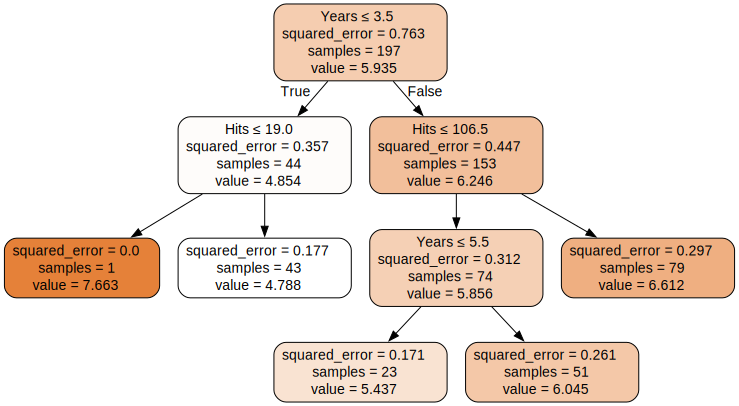

In [38]:
dot_data = tree.export_graphviz(model,out_file=None,feature_names=["Hits","Years"],class_names=['Salary'],filled=True,rounded=True,special_characters=True)

graphviz.Source(dot_data)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F.ej=Hud7vT9uozVaF5C">dot_data</variable><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="y)}CJbWuNk[5e38?/#{t">model</variable></variables><block type="variables_set" id=":6*zm74#9$!O3?QVUukE" x="36" y="141"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field><value name="VALUE"><block type="varDoMethod" id="jsRyzb,9t~G^G@G@SMkS"><mutation items="7"></mutation><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">export_graphviz</field><data>tree:export_graphviz</data><value name="ADD0"><block type="variables_get" id="x$]b$%X#}qjO@0H/!O|N"><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="K!=:ty3DMPs#b^ziH=5p"><field name="CODE">out_file=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="by]EM[Y$kMG~MfF0{q^,"><field name="CODE">feature_names=["Hits","Years"]</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="2hz~E.{8:W9-wWb*9Ut~"><field name="CODE">class_names=['Salary']</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="^IJ3b3Eg7K9k^6Of_4i%"><field name="CODE">filled=True</field></block></value><value name="ADD5"><block type="dummyOutputCodeBlock" id="VH!NxdBRgItjnN]Zs^Uh"><field name="CODE">rounded=True</field></block></value><value name="ADD6"><block type="dummyOutputCodeBlock" id="f*|7fCy,K/0{_WzfribG"><field name="CODE">special_characters=True</field></block></value></block></value></block><block type="varCreateObject" id="kDW*yX%xWoxx59k{G^.A" x="36" y="403"><mutation items="1"></mutation><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field><field name="MEMBER">Source</field><data>graphviz:Source</data><value name="ADD0"><block type="variables_get" id=")rj1yXTOUx%Dld{qs_z!"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field></block></value></block></xml>

Wow - look at that tree!
It's huge. 
A tree that big, with so many tiny decisions about slicing up the data according to only two predictors, almost has to be overfit.

There's an easy way to fix this, which is to introduce a penalty parameter into the tree.
Rather that recreate everything we've done up to this point, go back up to where you create the model and put this freestyle in its `using`

- `ccp_alpha=0.01`

This parameter, called *alpha*, penalizes the tree based on how many misclassifications it has and how many leaves it has.
Many penalization schemes have this kind of approach - they try to get "bang for the buck" - or most performance from the smallest/simplest model.

Just like we discussed with lasso and ridge regression, the specific value of the penalization is a hyperparameter you'd need to find for your data, which we'll talk about later on.

## Check your knowledge

**Hover to see the correct answer.**

1.  What is the primary difference between decision trees and regression trees?
- Decision trees are used for numerical predictions, while regression trees are for classification.
- <div title="Correct answer"> Regression trees are used for numerical predictions, while decision trees are for classification.</div>
- Both are used for numerical predictions, but regression trees assume linearity.
- Both are used for classification, but regression trees handle categorical variables better.

2.  Regression trees are considered non-parametric models because:
- They assume a linear relationship between response and features.
- <div title="Correct answer"> They make no assumptions about the relationship between response and features.</div>
- They require a normal distribution of the response variable.
- They only work with categorical features.

3.  In the example of predicting baseball players' salaries (Figure 1), what is the predicted salary for players with less than 4.5 years of experience?
- 5.107 (thousands of dollars)
- <div title="Correct answer"> $1000 * e^{5.107}$</div>
- 5.998 (thousands of dollars)
- The average salary of all players in the dataset.

4.  How are the regions ($R_1, R_2, \ldots, R_J$) in a regression tree typically defined for simplicity?
- Circles
- <div title="Correct answer"> Rectangles (or higher-dimension boxes)</div>
- Arbitrary shapes
- Overlapping regions

5.  The algorithm for constructing regression trees uses *recursive binary splitting*. What does this mean?
- The tree is split into multiple branches at once, choosing the best overall split.
- <div title="Correct answer"> At each split, the tree branches into two parts, choosing the best split to minimize the sum of squared differences.</div>
- The tree branches into two parts randomly at each split.
- The tree is split based on a pre-defined number of nodes.

6.  What is the purpose of "pruning" a regression tree?
- To make the tree larger and more complex.
- To increase the sum of squared errors.
- <div title="Correct answer"> To find an acceptable or optimal subtree that penalizes the sum of squared errors for having more nodes, similar to regularization.</div>
- To remove all nodes from the tree.

7.  Why is the `Salary` variable log-transformed in the baseball example?
- To make its distribution more skewed.
- To increase the influence of outliers.
- <div title="Correct answer"> To address the issue of outliers and make the distribution more symmetrical (bell-shape).</div>
- To convert it into a categorical variable.

8.  What does an $r^2$ value of `0.47301371565421835` on the testing set, compared to `0.6787409741390624` on the training set, indicate?
- The model is underfitting the data.
- The model is a perfect fit for the data.
- <div title="Correct answer"> The model is overfitting the training data, leading to poor generalization.</div>
- The model has too few nodes.

9.  What is `ccp_alpha` in `DecisionTreeRegressor` used for?
- To increase the complexity of the tree.
- To control the maximum depth of the tree.
- <div title="Correct answer"> To penalize the tree based on the number of misclassifications and leaves, preventing overfitting.</div>
- To set the minimum number of samples required to split an internal node.

<!--  -->